In [2]:
pip install Faker

Note: you may need to restart the kernel to use updated packages.


# FAKE DATA GENERATION

In [3]:
from faker import Faker
from datetime import datetime,timedelta
import random
import pandas as pd
import uuid
import numpy as np
import string

In [4]:
fake=Faker()

In [5]:
#user_signup_data
user_signup_data=[]
for n in range(500):
    first_name=fake.first_name()
    last_name=fake.last_name()
    mobile_number=fake.phone_number()
    email=fake.email()
    id_proof_type=random.choice(['Voter ID','Passport','Aadhaar'])
    id_proof_number=fake.uuid4()
    password=fake.password()
    date_of_birth=fake.date_of_birth().strftime('%Y-%m-%d')
    
    user={
        'first_name':first_name,
        'last_name':last_name,
        'mobile_number':mobile_number,
        'email':email,
        'id_proof_type':id_proof_type,
        'id_proof_number': id_proof_number,
       'date_of_birth':date_of_birth
    }
    user_signup_data.append(user)

In [6]:
df_user_signup_data=pd.DataFrame(user_signup_data)

In [7]:
df_user_signup_data.to_csv("user_signup_data.csv")

In [8]:
#user login
emails = [user['email'] for user in user_signup_data]
def generate_fake_password(length=10):
    characters = string.ascii_letters + string.digits
    return ''.join(random.choice(characters) for n in range(length))
login_password = [generate_fake_password() for n in range(len(emails))]

user_login_data = {
    'email': emails,
    'password': login_password
}

In [9]:
df_user_login_data=pd.DataFrame(user_login_data)

In [10]:
df_user_login_data.to_csv("user_login_data.csv")

In [11]:
#ticket booking details of passenger
unique_id=[]
source=[]
destination=[]
flight_number=[]
flight_name=[]
seat_type=[]
food_and_beverage=[]
wheelchair_assistance=[]
physically_disabled=[]
extra_baggage=[]
response_address=[]
booking_time = []
flight_date = []
prices = []

In [12]:
email = [user['email'] for user in user_signup_data]

num_records = 500
total_seats=100
base_prices = {
    'Economy': 500,
    'Business': 800,
    'First Class':1200
}
flights={'AirIndia':['A1I24','A3I24','A1I47','A5I89'],'SpiceJet':['S4J51','S7J89','S1J56'],'IndiGo':['I7G48','I2G14','I5G12'],
         'AirAsia':['A7A14','A8A45'],'Emirates':['E1136','E1247']}
seat_types = ['Economy', 'Business', 'First Class']
food_options = ['Vegetarian', 'Non_Vegetarian']
yes_no = [True, False]
cities=['kolkata','mumbai','delhi','chennai']

for i in range(num_records):
    unique_id.append(fake.uuid4())
    #source.append(fake.city())
    #destination.append(fake.city())
    src=random.choice(cities)
    source.append(src)
    dest=random.choice(cities)
    if src!= dest:
        destination.append(dest)
    else:
        destination.append(random.choice(cities)) 
    f_name=random.choice(list(flights.keys()))
    flight_name.append(f_name)
    f_number=random.choice(flights[f_name])
    flight_number.append(f_number)
    chosen_seat_type = random.choice(seat_types)
    seat_type.append(chosen_seat_type)
    food_and_beverage.append(random.choice(food_options))
    wheelchair_assistance.append(random.choice(yes_no))
    physically_disabled.append(random.choice(yes_no))
    extra_baggage.append(random.choice(yes_no))
    response_address.append(email[i])
    booking_time.append(fake.date_time_this_year())
    flight_date.append(datetime.now() + timedelta(days=random.randint(1, 1500)))
    prices.append(base_prices[chosen_seat_type])
    
ticket_booking_data = {
    'pnr': unique_id,
    'flight_no': flight_number,
    'flight_name':flight_name,
    'seat_type': seat_type,
    'food_and_beverage': food_and_beverage,
    'booking_time': booking_time,
    'wheelchair_assistance': wheelchair_assistance,
    'extra_baggage': extra_baggage,
    'price': prices,
    'email': response_address,
    
    'source': source,
    'destination': destination,
    'flight_date': flight_date,
    
    
    
    
    'physically_disabled': physically_disabled,
    
    
    
    
    
}
pd.DataFrame(ticket_booking_data)

,pnr,flight_no,flight_name,seat_type,food_and_beverage,booking_time,wheelchair_assistance,extra_baggage,price,email,source,destination,flight_date,physically_disabled
0,c34de84e-e419-4327-b2c0-c284dd5ec1d6,E1136,Emirates,Economy,Non_Vegetarian,2024-04-21 04:58:49,True,False,500,barbaramolina@example.org,mumbai,kolkata,2024-10-20 17:45:06.327679,False
1,4296085f-a10c-416b-bc1c-9f2f92c7b15a,E1247,Emirates,First Class,Vegetarian,2024-05-16 17:22:11,True,False,1200,jennifer65@example.net,chennai,kolkata,2025-07-13 17:45:06.327679,False
2,82132eb5-caf2-48ba-adfc-a08a7fd891ab,S1J56,SpiceJet,First Class,Vegetarian,2024-05-22 04:51:45,True,False,1200,kathleen85@example.org,mumbai,delhi,2027-02-17 17:45:06.327679,True
3,a6eec528-51b6-4e17-a3b4-ae59b989927d,S4J51,SpiceJet,Economy,Non_Vegetarian,2024-03-31 02:54:37,True,True,500,jack68@example.org,kolkata,delhi,2027-11-11 17:45:06.327679,False
4,06f12c2d-a887-435a-910e-0d0a2616ee9f,E1136,Emirates,Business,Non_Vegetarian,2024-04-10 13:11:14,False,True,800,amanda22@example.com,mumbai,chennai,2025-12-21 17:45:06.327679,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,41d437cc-2cb9-4a7b-8c16-d5abaa2bc8f6,A8A45,AirAsia,First Class,Vegetarian,2024-05-04 18:24:01,True,True,1200,greenewendy@example.org,kolkata,delhi,2026-11-21 17:45:06.342986,True
496,61b65021-d849-4e46-97d4-349182ca7057,S4J51,SpiceJet,Business,Vegetarian,2024-04-01 00:15:15,True,False,800,morrisonelizabeth@example.com,delhi,mumbai,2027-10-14 17:45:06.342986,False
497,d7dc80d4-c9f4-4620-aff4-b7b654e6c68b,I2G14,IndiGo,Business,Non_Vegetarian,2024-02-22 03:56:13,False,False,800,parsonselizabeth@example.com,delhi,kolkata,2028-01-06 17:45:06.342986,False
498,0e30517a-e5d6-4b45-ae67-ecb2dbece39c,A5I89,AirIndia,First Class,Vegetarian,2024-02-17 21:37:06,False,True,1200,osmith@example.com,delhi,mumbai,2025-09-23 17:45:06.342986,True


In [13]:
df=pd.DataFrame(ticket_booking_data)

In [14]:
df.to_csv("ticket_booking_data.csv")

In [15]:
df.head()

,pnr,flight_no,flight_name,seat_type,food_and_beverage,booking_time,wheelchair_assistance,extra_baggage,price,email,source,destination,flight_date,physically_disabled
0,c34de84e-e419-4327-b2c0-c284dd5ec1d6,E1136,Emirates,Economy,Non_Vegetarian,2024-04-21 04:58:49,True,False,500,barbaramolina@example.org,mumbai,kolkata,2024-10-20 17:45:06.327679,False
1,4296085f-a10c-416b-bc1c-9f2f92c7b15a,E1247,Emirates,First Class,Vegetarian,2024-05-16 17:22:11,True,False,1200,jennifer65@example.net,chennai,kolkata,2025-07-13 17:45:06.327679,False
2,82132eb5-caf2-48ba-adfc-a08a7fd891ab,S1J56,SpiceJet,First Class,Vegetarian,2024-05-22 04:51:45,True,False,1200,kathleen85@example.org,mumbai,delhi,2027-02-17 17:45:06.327679,True
3,a6eec528-51b6-4e17-a3b4-ae59b989927d,S4J51,SpiceJet,Economy,Non_Vegetarian,2024-03-31 02:54:37,True,True,500,jack68@example.org,kolkata,delhi,2027-11-11 17:45:06.327679,False
4,06f12c2d-a887-435a-910e-0d0a2616ee9f,E1136,Emirates,Business,Non_Vegetarian,2024-04-10 13:11:14,False,True,800,amanda22@example.com,mumbai,chennai,2025-12-21 17:45:06.327679,False


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   pnr                    500 non-null    object        
 1   flight_no              500 non-null    object        
 2   flight_name            500 non-null    object        
 3   seat_type              500 non-null    object        
 4   food_and_beverage      500 non-null    object        
 5   booking_time           500 non-null    datetime64[ns]
 6   wheelchair_assistance  500 non-null    bool          
 7   extra_baggage          500 non-null    bool          
 8   price                  500 non-null    int64         
 9   email                  500 non-null    object        
 10  source                 500 non-null    object        
 11  destination            500 non-null    object        
 12  flight_date            500 non-null    datetime64[ns]
 13  physi

In [17]:
df.describe()

,booking_time,price,flight_date
count,500,500.00000,500
mean,2024-04-10 12:13:47.754000128,854.00000,2026-07-26 10:24:27.936463104
min,2024-01-01 13:31:50,500.00000,2024-07-19 17:45:06.342259
25%,2024-02-19 20:26:33.249999872,500.00000,2025-07-16 17:45:06.342985984
50%,2024-04-11 01:49:37.500000,800.00000,2026-06-25 17:45:06.335332608
75%,2024-05-30 10:07:21.500000,1200.00000,2027-08-16 23:45:06.327678976
max,2024-07-18 11:22:30,1200.00000,2028-08-26 17:45:06.342986
std,NaN,294.78432,NaN


In [20]:
import random
from datetime import datetime, timedelta

flights = {
    'AirIndia': {'A1I24': ('kolkata', 'mumbai'), 'A3I24': ('delhi', 'chennai'), 'A1I47': ('mumbai', 'delhi'), 'A5I89': ('chennai', 'kolkata')},
    'SpiceJet': {'S4J51': ('delhi', 'mumbai'), 'S7J89': ('chennai', 'delhi'), 'S1J56': ('kolkata', 'chennai')},
    'IndiGo': {'I7G48': ('mumbai', 'chennai'), 'I2G14': ('delhi', 'kolkata'), 'I5G12': ('chennai', 'mumbai')},
    'AirAsia': {'A7A14': ('kolkata', 'delhi'), 'A8A45': ('mumbai', 'kolkata')},
    'Emirates': {'E1136': ('delhi', 'mumbai'), 'E1247': ('chennai', 'delhi')}
}
seat_types = ['Economy', 'Business', 'First Class']
food_options = ['Vegetarian', 'Non_Vegetarian']
yes_no = [True, False]
base_prices = {
    'Economy': 500,
    'Business': 800,
    'First Class': 1200
}

def generate_date():
    start_date = datetime.now()
    end_date = start_date + timedelta(days=30)
    return start_date + (end_date - start_date) * random.random()

def generate_time():
    return f"{random.randint(0, 23):02}:{random.randint(0, 59):02}"

def generate_duration():
    return f"{random.randint(1, 5)}h {random.randint(0, 59)}m"
flight_data_list = []

for flight_name, flight_info in flights.items():
    for flight_number, (source, destination) in flight_info.items():
        flight_date = generate_date().strftime("%Y-%m-%d")
        departure = generate_time()
        arrival = generate_time()
        duration = generate_duration()
        no_of_seats = random.randint(50, 200)
        prices = {seat: base_prices[seat] * random.uniform(1, 1.5) for seat in seat_types}

        flight_data = {
            'unique_id': flight_number,
            'source': source,
            'destination': destination,
            'flight_date': flight_date,
            'price': prices,
            'flight_name': flight_name,
            'arrival': arrival,
            'departure': departure,
            'duration': duration,
            'no_of_seats': no_of_seats,
        }

        flight_data_list.append(flight_data)

df_flight = pd.DataFrame(flight_data_list)


In [22]:
df_flight

,unique_id,source,destination,flight_date,price,flight_name,arrival,departure,duration,no_of_seats
0,A1I24,kolkata,mumbai,2024-08-09,"{'Economy': 590.5363242866653, 'Business': 812...",AirIndia,08:02,13:12,3h 57m,181
1,A3I24,delhi,chennai,2024-08-04,"{'Economy': 741.2003143860618, 'Business': 102...",AirIndia,18:28,20:04,2h 50m,117
2,A1I47,mumbai,delhi,2024-08-13,"{'Economy': 561.1941282226225, 'Business': 110...",AirIndia,19:16,12:38,1h 27m,107
3,A5I89,chennai,kolkata,2024-08-09,"{'Economy': 594.635089986142, 'Business': 982....",AirIndia,20:42,11:13,2h 47m,158
4,S4J51,delhi,mumbai,2024-07-22,"{'Economy': 595.3717329892173, 'Business': 116...",SpiceJet,06:25,18:33,4h 6m,62
5,S7J89,chennai,delhi,2024-08-06,"{'Economy': 732.0820550181618, 'Business': 106...",SpiceJet,20:47,10:57,4h 15m,181
6,S1J56,kolkata,chennai,2024-08-06,"{'Economy': 657.6261222512848, 'Business': 887...",SpiceJet,03:22,00:07,4h 25m,169
7,I7G48,mumbai,chennai,2024-07-29,"{'Economy': 587.6049957283867, 'Business': 107...",IndiGo,14:40,07:51,2h 12m,170
8,I2G14,delhi,kolkata,2024-07-24,"{'Economy': 675.327374704432, 'Business': 1149...",IndiGo,03:58,05:20,2h 36m,93
9,I5G12,chennai,mumbai,2024-08-04,"{'Economy': 608.5797374569155, 'Business': 104...",IndiGo,12:34,00:04,3h 58m,145


In [17]:
df.dropna(inplace=True)

In [18]:
import pandas as pd

# ADDING ADDITIONAL FEATURES

In [19]:
df['flight_date'] = pd.to_datetime(df['flight_date'])
df['month'] = df['flight_date'].dt.month
df['day'] = df['flight_date'].dt.day
df['remaining_seats'] = df.groupby(['flight_number', 'seat_type'])['seat_type'].transform('count') - df.groupby(['flight_number', 'seat_type']).cumcount()

In [20]:
df.head()

,unique_id,source,destination,flight_number,flight_name,seat_type,food_and_beverage,wheelchair_assistance,physically_disabled,extra_baggage,response_address,booking_time,flight_date,price,month,day,remaining_seats
0,a2807344-6c58-4d6d-a99b-4db166e616cd,mumbai,chennai,E1136,Emirates,Business,Vegetarian,True,True,False,kevin27@example.net,2024-01-07 16:56:37,2027-02-07 12:44:35.387019,800,2,7,20
1,fab47ebb-f2ba-4e08-9be9-db797ec384db,delhi,chennai,I7G48,IndiGo,Economy,Vegetarian,False,False,False,samanthaking@example.com,2024-06-27 21:48:23,2027-07-21 12:44:35.387019,500,7,21,11
2,3e4dcb95-be5c-4974-ab6a-577c4137698f,kolkata,delhi,A7A14,AirAsia,First Class,Non_Vegetarian,True,True,False,victoria59@example.org,2024-07-11 01:29:01,2028-04-12 12:44:35.387019,1200,4,12,17
3,188fd517-0591-4ea1-a6f3-b4e70a1d657e,chennai,delhi,A8A45,AirAsia,First Class,Vegetarian,True,True,False,mary51@example.org,2024-07-13 10:44:40,2025-02-01 12:44:35.387019,1200,2,1,16
4,6f163ab3-1a64-4932-856c-61ebe1ddff1a,chennai,delhi,E1136,Emirates,First Class,Vegetarian,True,True,False,vgray@example.net,2024-03-02 03:21:10,2026-12-27 12:44:35.387019,1200,12,27,19


In [21]:
df['booking_lead_time'] = (df['flight_date'] - pd.to_datetime(df['booking_time'])).dt.days

In [22]:
df.head()

,unique_id,source,destination,flight_number,flight_name,seat_type,food_and_beverage,wheelchair_assistance,physically_disabled,extra_baggage,response_address,booking_time,flight_date,price,month,day,remaining_seats,booking_lead_time
0,a2807344-6c58-4d6d-a99b-4db166e616cd,mumbai,chennai,E1136,Emirates,Business,Vegetarian,True,True,False,kevin27@example.net,2024-01-07 16:56:37,2027-02-07 12:44:35.387019,800,2,7,20,1126
1,fab47ebb-f2ba-4e08-9be9-db797ec384db,delhi,chennai,I7G48,IndiGo,Economy,Vegetarian,False,False,False,samanthaking@example.com,2024-06-27 21:48:23,2027-07-21 12:44:35.387019,500,7,21,11,1118
2,3e4dcb95-be5c-4974-ab6a-577c4137698f,kolkata,delhi,A7A14,AirAsia,First Class,Non_Vegetarian,True,True,False,victoria59@example.org,2024-07-11 01:29:01,2028-04-12 12:44:35.387019,1200,4,12,17,1371
3,188fd517-0591-4ea1-a6f3-b4e70a1d657e,chennai,delhi,A8A45,AirAsia,First Class,Vegetarian,True,True,False,mary51@example.org,2024-07-13 10:44:40,2025-02-01 12:44:35.387019,1200,2,1,16,203
4,6f163ab3-1a64-4932-856c-61ebe1ddff1a,chennai,delhi,E1136,Emirates,First Class,Vegetarian,True,True,False,vgray@example.net,2024-03-02 03:21:10,2026-12-27 12:44:35.387019,1200,12,27,19,1030


In [23]:
df['source'].unique()

array(['mumbai', 'delhi', 'kolkata', 'chennai'], dtype=object)

In [24]:
df['destination'].unique()

array(['chennai', 'delhi', 'mumbai', 'kolkata'], dtype=object)

In [25]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [26]:
from geopy.geocoders import Nominatim

In [27]:
geolocator = Nominatim(user_agent="flight_dynamic_pricing")

In [28]:

def get_coords(location):
    try:
        loc = geolocator.geocode(location)
        if loc:
            return loc.latitude, loc.longitude
        else:
            return np.nan, np.nan
    except:
        return np.nan, np.nan

In [29]:
df['source_lat'], df['source_lon'] = zip(*df['source'].apply(get_coords))
df['dest_lat'], df['dest_lon'] = zip(*df['destination'].apply(get_coords))

In [30]:
from geopy.distance import great_circle
df['distance'] = df.apply(lambda row: great_circle((row['source_lat'], row['source_lon']),
                                                                       (row['dest_lat'], row['dest_lon'])).km
                                              if not np.isnan(row['source_lat']) and not np.isnan(row['dest_lat'])
                                              else np.nan, axis=1)


In [31]:
df.head()

,unique_id,source,destination,flight_number,flight_name,seat_type,food_and_beverage,wheelchair_assistance,physically_disabled,extra_baggage,...,price,month,day,remaining_seats,booking_lead_time,source_lat,source_lon,dest_lat,dest_lon,distance
0,a2807344-6c58-4d6d-a99b-4db166e616cd,mumbai,chennai,E1136,Emirates,Business,Vegetarian,True,True,False,...,800,2,7,20,1126,19.081577,72.886628,13.083694,80.270186,1032.648461
1,fab47ebb-f2ba-4e08-9be9-db797ec384db,delhi,chennai,I7G48,IndiGo,Economy,Vegetarian,False,False,False,...,500,7,21,11,1118,28.627393,77.171695,13.083694,80.270186,1757.853639
2,3e4dcb95-be5c-4974-ab6a-577c4137698f,kolkata,delhi,A7A14,AirAsia,First Class,Non_Vegetarian,True,True,False,...,1200,4,12,17,1371,22.572646,88.363895,28.627393,77.171695,1307.748300
3,188fd517-0591-4ea1-a6f3-b4e70a1d657e,chennai,delhi,A8A45,AirAsia,First Class,Vegetarian,True,True,False,...,1200,2,1,16,203,13.083694,80.270186,28.627393,77.171695,1757.853639
4,6f163ab3-1a64-4932-856c-61ebe1ddff1a,chennai,delhi,E1136,Emirates,First Class,Vegetarian,True,True,False,...,1200,12,27,19,1030,13.083694,80.270186,28.627393,77.171695,1757.853639


In [32]:
df=df.drop(['unique_id','food_and_beverage','wheelchair_assistance','physically_disabled','extra_baggage','response_address','booking_time','flight_date','source_lat','source_lon','dest_lat','dest_lon','source','destination','flight_number'],axis=1)

In [33]:
df.head()

,flight_name,seat_type,price,month,day,remaining_seats,booking_lead_time,distance
0,Emirates,Business,800,2,7,20,1126,1032.648461
1,IndiGo,Economy,500,7,21,11,1118,1757.853639
2,AirAsia,First Class,1200,4,12,17,1371,1307.748300
3,AirAsia,First Class,1200,2,1,16,203,1757.853639
4,Emirates,First Class,1200,12,27,19,1030,1757.853639


In [34]:
df['remaining_seats'].unique()

array([20, 11, 17, 16, 19,  9, 12, 13, 23, 21,  6,  8, 15, 10, 18, 14,  4,
        7,  3, 22,  5,  2,  1], dtype=int64)

In [35]:
price_per_km=5
def price_calculation(df):
    for index,rows in df.iterrows():
        distance=df['distance'].iloc[index]
        price=df['price'].iloc[index]
        df.at[index,'price']=price+(distance*price_per_km)

In [36]:
price_calculation(df)

In [37]:
df.head()

,flight_name,seat_type,price,month,day,remaining_seats,booking_lead_time,distance
0,Emirates,Business,5963.242307,2,7,20,1126,1032.648461
1,IndiGo,Economy,9289.268194,7,21,11,1118,1757.853639
2,AirAsia,First Class,7738.741500,4,12,17,1371,1307.748300
3,AirAsia,First Class,9989.268194,2,1,16,203,1757.853639
4,Emirates,First Class,9989.268194,12,27,19,1030,1757.853639


In [38]:
def price_hike_brand(df):
    for index,rows in df.iterrows():
        brand=df['flight_name'].iloc[index].lower()
        price=df['price'].iloc[index]
        if brand=='airasia':
            df.at[index,'price']=price
        elif brand=='spicejet':
            df.at[index,'price']=price*1.03
        elif brand=='indigo':
            df.at[index,'price']=price*1.02
        elif brand=='airindia':
            df.at[index,'price']=price*1.05
        elif brand=='emirates':
            df.at[index,'price']=price*1.07

In [39]:
price_hike_brand(df)

In [40]:
df.head()

,flight_name,seat_type,price,month,day,remaining_seats,booking_lead_time,distance
0,Emirates,Business,6380.669268,2,7,20,1126,1032.648461
1,IndiGo,Economy,9475.053558,7,21,11,1118,1757.853639
2,AirAsia,First Class,7738.741500,4,12,17,1371,1307.748300
3,AirAsia,First Class,9989.268194,2,1,16,203,1757.853639
4,Emirates,First Class,10688.516968,12,27,19,1030,1757.853639


In [41]:
total_seats=150
remaining_seats_filled_90_percent=(total_seats*0.1)
remaining_seats_filled_75_percent=(total_seats*0.25)
def dynamic_pricing(df):
    for index,rows in df.iterrows():
        remaining_seats=df['remaining_seats'].iloc[index]
        corresponding_price=df['price'].iloc[index]
        if remaining_seats<=remaining_seats_filled_90_percent:
            df.at[index,'price']=corresponding_price*1.1
        elif remaining_seats<=remaining_seats_filled_75_percent and remaining_seats>remaining_seats_filled_90_percent:
            df.at[index,'price']=corresponding_price*1.05
        else:
            df.at[index,'price']=corresponding_price

In [42]:
dynamic_pricing(df)

In [43]:
df.head()

,flight_name,seat_type,price,month,day,remaining_seats,booking_lead_time,distance
0,Emirates,Business,6699.702732,2,7,20,1126,1032.648461
1,IndiGo,Economy,10422.558914,7,21,11,1118,1757.853639
2,AirAsia,First Class,8125.678575,4,12,17,1371,1307.748300
3,AirAsia,First Class,10488.731604,2,1,16,203,1757.853639
4,Emirates,First Class,11222.942816,12,27,19,1030,1757.853639


In [44]:
def booking_time(df):
    for index,rows in df.iterrows():
        price=df['price'].iloc[index]
        days=df['booking_lead_time'].iloc[index]
        if days<1000:
            df.at[index,'price']=price
        elif days>1000 and days<2000:
            df.at[index,'price']=price*1.01
        elif days>2000:
            df.at[index,'price']=price*1.02
    return df

In [45]:
booking_time(df)

,flight_name,seat_type,price,month,day,remaining_seats,booking_lead_time,distance
0,Emirates,Business,6766.699759,2,7,20,1126,1032.648461
1,IndiGo,Economy,10526.784503,7,21,11,1118,1757.853639
2,AirAsia,First Class,8206.935361,4,12,17,1371,1307.748300
3,AirAsia,First Class,10488.731604,2,1,16,203,1757.853639
4,Emirates,First Class,11335.172244,12,27,19,1030,1757.853639
...,...,...,...,...,...,...,...,...
495,AirIndia,First Class,7333.738701,10,16,1,867,1029.911463
496,Emirates,Business,10674.022575,5,24,2,804,1653.767642
497,SpiceJet,Economy,7141.075436,8,20,1,54,1160.560536
498,AirIndia,Economy,577.500000,3,8,1,647,0.000000


# FEATURE ENGINEERING

ONE HOT ENCODING

In [46]:
df=pd.get_dummies(df,columns=['flight_name','seat_type'])

In [47]:
df.head()

,price,month,day,remaining_seats,booking_lead_time,distance,flight_name_AirAsia,flight_name_AirIndia,flight_name_Emirates,flight_name_IndiGo,flight_name_SpiceJet,seat_type_Business,seat_type_Economy,seat_type_First Class
0,6766.699759,2,7,20,1126,1032.648461,False,False,True,False,False,True,False,False
1,10526.784503,7,21,11,1118,1757.853639,False,False,False,True,False,False,True,False
2,8206.935361,4,12,17,1371,1307.748300,True,False,False,False,False,False,False,True
3,10488.731604,2,1,16,203,1757.853639,True,False,False,False,False,False,False,True
4,11335.172244,12,27,19,1030,1757.853639,False,False,True,False,False,False,False,True


In [48]:
df.columns.tolist()

['price',
 'month',
 'day',
 'remaining_seats',
 'booking_lead_time',
 'distance',
 'flight_name_AirAsia',
 'flight_name_AirIndia',
 'flight_name_Emirates',
 'flight_name_IndiGo',
 'flight_name_SpiceJet',
 'seat_type_Business',
 'seat_type_Economy',
 'seat_type_First Class']

# ANALYSIS

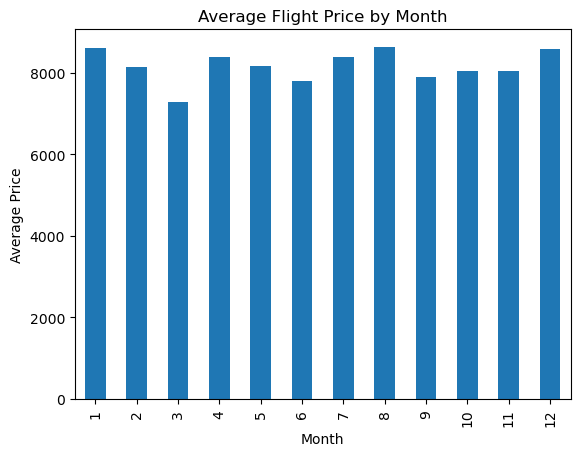

In [49]:
import matplotlib.pyplot as plt

average_price_by_month = df.groupby('month')['price'].mean()
average_price_by_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average Flight Price by Month')
plt.show()

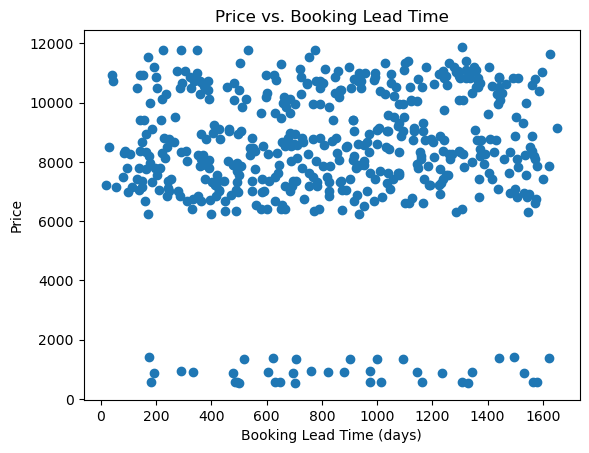

In [50]:
plt.scatter(df['booking_lead_time'], df['price'])
plt.xlabel('Booking Lead Time (days)')
plt.ylabel('Price')
plt.title('Price vs. Booking Lead Time')
plt.show()


# MODELING

In [51]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer, r2_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [52]:
X = df.drop('price', axis=1)
y = df['price']

In [53]:
# Scale the numerical features
scaler = StandardScaler()
numerical_features = ['month', 'day', 'remaining_seats', 'booking_lead_time', 'distance']
X[numerical_features] = scaler.fit_transform(X[numerical_features])


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [56]:
y_pred = model.predict(X_test)
accuracy_lr = r2_score(y_test, y_pred)
print(f"Accuracy score: {accuracy_lr}")

Accuracy score: 0.9964625478843934


In [57]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [58]:
y_pred = rf_model.predict(X_test)

In [59]:
accuracy_rf = r2_score(y_test, y_pred)
print(f"Accuracy score : {accuracy_rf}")

Accuracy score : 0.9931675550712099


In [60]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [61]:
y_pred = dt_model.predict(X_test)

In [62]:
accuracy_dt= r2_score(y_test, y_pred)
print(f"Accuracy score: {accuracy_dt}")

Accuracy score: 0.9885960351928743


# MODEL SELECTION

In [63]:
algorithms=['LinearRegression',' RandomForestRegressor','DecisionTreeRegressor']
accuracy=[0.9989145322369978,0.9989923521307371,0.9996837278072453]
for i in range(3):
    print("{0}-------------->{1:.5f}".format(algorithms[i],accuracy[i]*100))

LinearRegression-------------->99.89145
 RandomForestRegressor-------------->99.89924
DecisionTreeRegressor-------------->99.96837


# DECISION TREE REGRESSOR

HYPERPARAMETER TUNING

In [64]:
param_grid = {
    'max_depth': [3, 5, 7, 10,None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [65]:
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [66]:
best_params = grid_search.best_params_

In [67]:
best_model = DecisionTreeRegressor(**best_params)

In [68]:
# Perform cross-validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_model, X, y, cv=5, scoring='neg_mean_squared_error')

In [69]:
print("Cross-Validation Scores:", scores)
print("Average Score:", -scores.mean())  

Cross-Validation Scores: [-49815.99460306 -25061.23976555 -20023.87466435 -17259.52154139
  -9258.74967956]
Average Score: 24283.876050782077


In [70]:
best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)

In [71]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Mean Squared Error: 46576.81655482469


In [72]:
accuracy_best_model= r2_score(y_test, y_pred)
print(f"Accuracy score: {accuracy_best_model}")

Accuracy score: 0.9888883288678303


In [73]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best parameters: {best_params}")
print(f"Best model: {best_model}")

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best model: DecisionTreeRegressor(random_state=42)


In [74]:
selected_features = X_train.columns
print(f"Features used in the best model: {list(selected_features)}")

Features used in the best model: ['month', 'day', 'remaining_seats', 'booking_lead_time', 'distance', 'flight_name_AirAsia', 'flight_name_AirIndia', 'flight_name_Emirates', 'flight_name_IndiGo', 'flight_name_SpiceJet', 'seat_type_Business', 'seat_type_Economy', 'seat_type_First Class']


In [75]:
mse = mean_squared_error(y_test, y_pred)
print(f'Test set Mean Squared Error: {mse}')

Test set Mean Squared Error: 46576.81655482469


In [76]:
X_test

,month,day,remaining_seats,booking_lead_time,distance,flight_name_AirAsia,flight_name_AirIndia,flight_name_Emirates,flight_name_IndiGo,flight_name_SpiceJet,seat_type_Business,seat_type_Economy,seat_type_First Class
361,1.028219,0.391834,0.109509,1.259458,0.082140,False,False,True,False,False,True,False,False
73,-1.032930,-0.499204,1.335360,-0.152397,0.867101,False,False,False,False,True,False,True,False
374,1.617118,-1.613002,-0.912033,0.254958,0.867101,False,True,False,False,False,True,False,False
155,1.617118,-0.610584,0.926743,1.252515,1.103225,True,False,False,False,False,True,False,False
104,-1.621829,-0.721964,1.539669,-1.119865,1.103225,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,1.617118,-0.387824,-0.299108,1.048837,1.103225,False,False,True,False,False,False,True,False
86,0.733769,1.394252,1.539669,-1.707752,-0.282278,False,False,False,True,False,False,False,True
75,0.439319,-0.833344,1.948286,-1.585083,-0.541937,False,False,True,False,False,False,False,True
438,1.322668,1.617012,-0.912033,1.240942,-0.541937,False,False,False,False,True,True,False,False


In [77]:
len(X_test.columns)

13

In [78]:
# Feature importances
feature_importances = best_model.feature_importances_
print(f'Feature importances: {feature_importances}')

Feature importances: [1.39339950e-04 5.20613284e-04 8.09648788e-04 5.13109471e-04
 9.77869930e-01 1.43016455e-03 1.02959690e-03 2.61914676e-03
 1.61718460e-04 1.05159879e-04 6.56957528e-04 4.68846343e-03
 9.45615142e-03]


In [79]:
# Number of features with non-zero importance
num_important_features = (feature_importances > 0).sum()
print(f'Number of features with non-zero importance: {num_important_features}')

Number of features with non-zero importance: 13


# TESTING

In [80]:
#return in string
#if seat full return null
#api call this function along with data preprocessing

In [81]:
curr_date=pd.to_datetime("today")
flight_date=pd.to_datetime(input("Enter flight date in m/d/y : "))
source=input("Enter source :")
destination=input("Enter destination : ")
seat_type=input("Enter seat type : ").strip(" ").lower()
flight=input("Enter flight id : ")


flights={'AirIndia':['A1I24','A3I24','A1I47','A5I89'],'SpiceJet':['S4J51','S7J89','S1J56'],'IndiGo':['I7G48','I2G14','I5G12'],
         'AirAsia':['A7A14','A8A45'],'Emirates':['E1136','E1247']}

def find_airline(flights, flight_number):
    for airline, flight_list in flights.items():
        if flight_number in flight_list:
            return airline
flight_name=find_airline(flights,flight)

month=curr_date.month
day=curr_date.day
remaining_seats=int(input("eNTER REMAINING SEATS :"))
booking_lead_time=(flight_date-curr_date).days

Enter flight date in m/d/y : 10/25/2025
Enter source :kolkata
Enter destination : delhi
Enter seat type : economy
Enter flight id : E1136
eNTER REMAINING SEATS :6


In [82]:
source_lat,source_lon= get_coords(source)
dest_lat,dest_lon= get_coords(destination)

In [83]:
distance = great_circle((source_lat, source_lon), (dest_lat, dest_lon)).km if not (np.isnan(source_lat) or np.isnan(source_lon) or np.isnan(dest_lat) or np.isnan(dest_lon)) else np.nan

In [84]:
test_df={
    'flight_name' : flight_name,
    'seat_type' : seat_type,
    'month' : month,
    'day': day,
    'remaining_seats' : remaining_seats,
    'booking_lead_time' : booking_lead_time,
    'distance' : distance
}

In [85]:
test_df

{'flight_name': 'Emirates',
 'seat_type': 'economy',
 'month': 7,
 'day': 18,
 'remaining_seats': 6,
 'booking_lead_time': 463,
 'distance': 1307.7483000154564}

In [86]:
pd.DataFrame([test_df])

,flight_name,seat_type,month,day,remaining_seats,booking_lead_time,distance
0,Emirates,economy,7,18,6,463,1307.7483


In [87]:
def preprocess(test_df):
    test_df=pd.DataFrame([test_df])
    final_columns = ['month', 'day', 'remaining_seats', 'booking_lead_time', 'distance',
                     'flight_name_AirAsia', 'flight_name_AirIndia', 'flight_name_Emirates',
                     'flight_name_IndiGo', 'flight_name_SpiceJet', 'seat_type_Business',
                     'seat_type_Economy', 'seat_type_First Class']
    df_test=pd.get_dummies(test_df,columns=['flight_name', 'seat_type'])
    
    for column in final_columns:
        if column not in df_test.columns:
            df_test[column] = False
    df_test=df_test[final_columns]
    
    return df_test

In [88]:
preprocessed_df=preprocess(test_df)

In [89]:
preprocessed_df

,month,day,remaining_seats,booking_lead_time,distance,flight_name_AirAsia,flight_name_AirIndia,flight_name_Emirates,flight_name_IndiGo,flight_name_SpiceJet,seat_type_Business,seat_type_Economy,seat_type_First Class
0,7,18,6,463,1307.7483,False,False,True,False,False,False,False,False


In [90]:
preprocessed_df.shape

(1, 13)

In [91]:
predicted_price=best_model.predict(preprocessed_df)

In [92]:
predicted_price

array([10540.85774434])

In [93]:
import pickle
model_pkl_file = "flight_dynamic_pricing_model.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(best_model, file)